<a href="https://colab.research.google.com/github/1985shree/Data-science-Zoomcamp-projects/blob/main/binary_classification_roc_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#uploading ipynb from local folder to google drive/colab folder
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data = df [['neighbourhood_group', 'room_type','latitude','longitude','price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [6]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
latitude,40.6475,40.7536,40.809,40.6851,40.7985,40.7477,40.6869,40.7649,40.8018,40.7134
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944,-73.975,-73.956,-73.9849,-73.9672,-73.9904
price,149,225,150,89,80,200,60,79,79,150
minimum_nights,1,1,3,1,10,3,45,2,2,1
number_of_reviews,9,45,0,270,9,74,49,430,118,160
reviews_per_month,0.21,0.38,NaN,4.64,0.1,0.59,0.4,3.47,0.99,1.33
calculated_host_listings_count,6,2,1,1,1,1,1,1,1,4
availability_365,365,355,365,194,0,129,0,220,0,188


In [7]:
np.sum(data.isna())

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
data = data.fillna(0)

In [9]:
np.sum(data.isna())

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data.copy()

df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)
print( len (df_train), len(df_val), len(df_test))

df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)


y_train = df_train['price']
y_val = df_val['price']
y_test = df_test['price']


29337 9779 9779


In [13]:
above_average_train = (y_train >= 152).astype(int)
above_average_val =(y_val >= 152).astype(int) 
above_average_test = (y_test >= 152).astype(int)

In [12]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train.to_dict(orient = 'records')
train_dicts[0]  


{'availability_365': 50,
 'calculated_host_listings_count': 13,
 'latitude': 40.7276,
 'longitude': -73.94495,
 'minimum_nights': 3,
 'neighbourhood_group': 'Brooklyn',
 'number_of_reviews': 29,
 'price': 99,
 'reviews_per_month': 0.7,
 'room_type': 'Entire home/apt'}

In [15]:
dv = DictVectorizer(sparse = False)#we don"t want sparse matrix
X_train = dv.fit_transform(train_dicts)#fits and then transforms

val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [16]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [43]:
#chacking orthogonality of one hot encoded vectors: we don"t have to worry about inner or outer products since it's dot product.
for i in range(5, 9):
  ortho = (X_train[:, i]).dot(X_train[:, i+1])
  print(ortho)


0.0
0.0
0.0
0.0


**logistic regression by hand**

In [44]:
def train_lin_reg_regular(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    W_full = XTX_inv.dot(X.T).dot(y)

    w_0 = W_full[0]
    w = W_full[1:]
    return w_0, w

In [45]:
def sigmoid(z):
  sig = 1/(1 + np.exp(-z))
  return(sig)

In [46]:
#confusion matrix
def conf_mat(y_val, y_pred):
  conf_arr = [[0,0], [0,0]]


  for i in range(len(y_val)):
    if y_val[i] == 1:
      if y_pred[i] == 1:
        conf_arr[0][0] = conf_arr[0][0] + 1 #true positive (TP)
      else:
        conf_arr[1][0] = conf_arr[1][0] + 1 # false negative (FN)
  
               
    elif y_val[i] ==0:
      if y_pred[i] ==0:
        conf_arr[1][1] = conf_arr[1][1] + 1 #true negative (TN)
      else:
          conf_arr[0][1] = conf_arr[0][1] + 1  #false positive (FP)

  TPR = np.sum(conf_arr[0][0])/(np.sum(conf_arr[0][0]) + np.sum(conf_arr[1][0]))      
  FPR = np.sum(conf_arr[0][1])/(np.sum(conf_arr[0][1]) + np.sum(conf_arr[1][1]))
  accuracy = float(conf_arr[0][0] + conf_arr[1][1])/(len(y_pred))
  
  
  return conf_arr, accuracy, TPR, FPR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


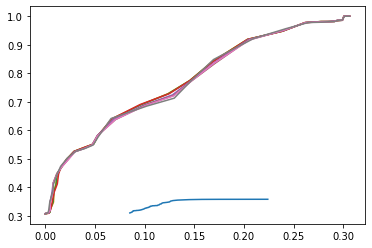

In [59]:
for r in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:

  w_0_reg, w_reg  = train_lin_reg_regular(X_train, above_average_train, r)
  true = []
  false = []
  X_val = X_val
  m = np.linspace(0, 1, 100)
  for j in m:
    y_pred_reg = w_0_reg + X_val.dot(w_reg)
    y_pred_sig = sigmoid(y_pred_reg)
    y_pred = (y_pred_sig >= j).astype(int)
    #print(y_pred)
    conf_arr, accuracy, TPR, FPR = conf_mat(y_pred, above_average_val.to_numpy())#forgot to transfer y_validation set to convert to numpy before
  #print(r, w_0_reg, score)
    true.append(TPR)
    true.sort()
    false.append(FPR)
    false.sort()
  plt.plot(false, true)


**feature elimination and further trial**

elimination of some numerical variables have shown increase in accuracy. we shall eliminate those variables and see if there's any improvement

In [49]:
all_var = ['latitude', 'longitude', 	'minimum_nights',  	'number_of_reviews', 	'reviews_per_month', 	'calculated_host_listings_count', 	'availability_365', 'neighbourhood_group', 'room_type']

In [50]:
new_var_1 = ['minimum_nights',  'reviews_per_month', 	'neighbourhood_group', 'room_type']

one-hot encoding for 

In [51]:
train_dict_1 = df_train[new_var_1].to_dict(orient = 'records')

dv = DictVectorizer(sparse = False)

dv.fit(train_dict_1)
X_train_1 = dv.transform(train_dict_1)

val_dict_1 = df_val[new_var_1].to_dict(orient = 'records')
X_val_1 = dv.transform(val_dict_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


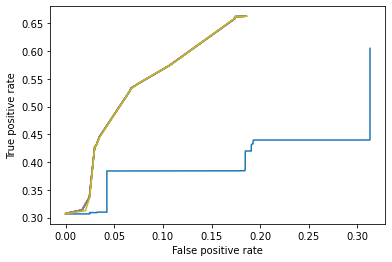

In [69]:
for r in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:

  w_0_reg, w_reg  = train_lin_reg_regular(X_train_1, above_average_train, r)
  true = []
  false = []
  
  m = np.linspace(0, 1, 100)
  for j in m:
    y_pred_reg = w_0_reg + X_val_1.dot(w_reg)
    y_pred_sig = sigmoid(y_pred_reg)
    y_pred = (y_pred_sig >= j).astype(int)
    #print(y_pred)
    conf_arr, accuracy, TPR, FPR = conf_mat(y_pred, above_average_val.to_numpy())#forgot to transfer y_validation set to convert to numpy before
  #print(r, w_0_reg, score)
    true.append(TPR)
    true.sort()
    false.append(FPR)
    false.sort()
  plt.plot(false, true)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')

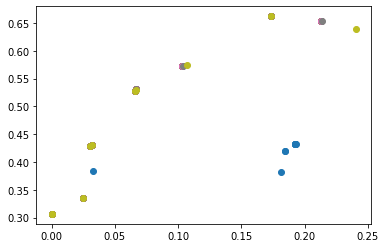

In [67]:
for r in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:

  w_0_reg, w_reg  = train_lin_reg_regular(X_train_1, above_average_train, r)
  true = []
  false = []
  
  m = np.linspace(0.45, 0.65, 10)
  for j in m:
    y_pred_reg = w_0_reg + X_val_1.dot(w_reg)
    y_pred_sig = sigmoid(y_pred_reg)
    y_pred = (y_pred_sig >= j).astype(int)
    #print(y_pred)
    conf_arr, accuracy, TPR, FPR = conf_mat(y_pred, above_average_val.to_numpy())#forgot to transfer y_validation set to convert to numpy before
  #print(r, w_0_reg, score)
    true.append(TPR)
    #true.sort()
    false.append(FPR)
    #false.sort()
  plt.scatter(false, true)